# Lab 2: Các phép toán cơ bản trên ảnh
1. Tạo âm bản
1. Cắt ngưỡng
1. Biến đổi Alpha Beta
1. Biến đổi Gamma
1. Histogram Stretching
1. Histogram Equalization

In [2]:
import numpy as np
import cv2 as cv2

In [3]:
gray = cv2.imread(r'./resources/grayscale.png', cv2.IMREAD_GRAYSCALE)
assert gray is not None

### 1. Tạo âm bản

In [3]:
def invert(gray):
    return 255 - gray

negative = invert(gray)

cv2.imshow('origin', gray)
cv2.imshow('negative', negative)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Cắt ngưỡng

In [4]:
def convertToBin(gray, threshold):
    out = gray > threshold
    return out.astype(np.uint8) * 255

mask = convertToBin(gray, 40)

cv2.imshow('origin', gray)
cv2.imshow('untitled', mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. Biến đổi Alpha Beta (Brightness and Contrast adjusment)

In [5]:
def alphaBetaTransform(gray, alpha, beta):
    out = np.copy(gray).astype(np.float64)
    out = alpha*out + beta
    return np.clip(out, 0, 255).astype(np.uint8)

transformed = alphaBetaTransform(gray, 2, 0)

cv2.imshow('origin', gray)
cv2.imshow('transformed', transformed)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Biến đổi Gamma

In [6]:
def gammaTransform (gray, gamma):
    out = np.copy(gray).astype(np.float64)
    out = out/255
    out = (out**gamma)*255
    return np.clip(out, 0, 255).astype(np.uint8)

transformed = gammaTransform(gray, 0.5)

cv2.imshow('origin', gray)
cv2.imshow('transformed', transformed)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. Histogram Stretching

In [7]:
def stretchHist (gray):
    out = np.copy(gray).astype(np.float64)
    out = 255 * ((out - out.min())/(out.max() - out.min()))
    return np.clip(out, 0, 255).astype(np.uint8)

transformed = stretchHist(gray)

cv2.imshow('origin', gray)
cv2.imshow('transformed', transformed)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. Histogram Equalization

In [7]:
def hist(gray):
    return np.array([(gray==i).sum() for i in range(0, 256)])

def cdf(gray):
    out = np.arange(0, 256)
    norm_hist = hist(gray) / gray.size
    return np.array([norm_hist[0:i+1].sum() for i in out])

def equalizeHist(gray):
    cdf_arr = cdf(gray)
    out = np.zeros_like(gray)
    M,N = out.shape
    for r in range(0, M):
        for c in range(0, N):
            out[r][c] = 255.0*cdf_arr[gray[r][c]]
    return out

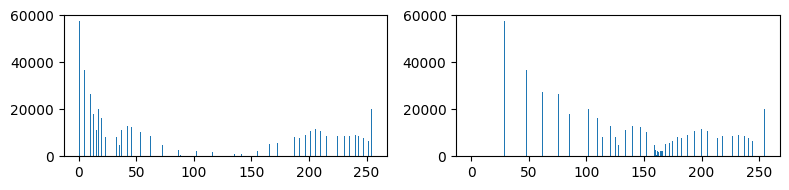

In [8]:
import matplotlib.pyplot as plt

img = cv2.imread(r'./resources/low-contrast.png', cv2.IMREAD_COLOR_BGR)
assert img is not None

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = hsv[:,:,2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
axes[0].bar(height=hist(gray), x=np.arange(0, 256))
axes[1].bar(height=hist(equalizeHist(gray)), x=np.arange(0, 256))

plt.tight_layout()
plt.show()

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = equalizeHist(hsv[:,:,2])
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('origin', img)
cv2.imshow('transformed', bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Compare All

In [15]:
img = cv2.imread(r'./resources/low-contrast.png', cv2.IMREAD_COLOR_BGR)
assert img is not None

cv2.imshow('origin', img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = alphaBetaTransform(hsv[:,:,2], 2, 0)
cv2.imshow('alpha beta', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = gammaTransform(hsv[:,:,2], 0.5)
cv2.imshow('gamma', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = stretchHist(hsv[:,:,2])
cv2.imshow('stretching', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = equalizeHist(hsv[:,:,2])
cv2.imshow('equalization', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = equalizeHist(hsv[:,:,2])
hsv[:,:,2] = stretchHist(hsv[:,:,2])
cv2.imshow('equalization + stretching', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))


cv2.waitKey(0)
cv2.destroyAllWindows()
